# MNIST Data Set with keras

In [1]:
#Loading modules
import numpy as np

import keras
# labeled dataset
from keras.datasets import mnist
# keras cnn building
from keras.models import Sequential
from keras.layers import  Conv2D, Dense, Dropout, Flatten, MaxPooling2D
#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
''''Trains a simple convnet on the MNIST dataset.
'''
# batch size
batch_size = 128
# 10 different numbers to label...
num_classes = 10
# training time epochs
epochs = 10

# input image dimensions, MNIST has 28x28 pixel images
img_rows, img_cols = 28, 28

# split between training and test set, no need for sklearn with mnist data...
(x_train, y_train), (x_test, y_test) = mnist.load_data()



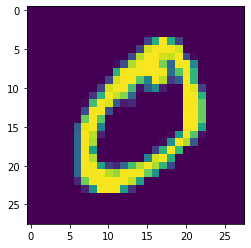

In [3]:
#visualise an element of training set

plt.imshow(x_train[1])

In [4]:

#data shape
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# changing type to float32 allows model to run more efficiently
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#rescale rgbs to [0,1]
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
train_size = x_train.shape[0]
test_size = x_test.shape[0]
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one hot encoding target variable
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# keras model
model = Sequential()
# convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# split image into smaller subsets of images
model.add(Conv2D(64, (3, 3), activation='relu'))
# pooling to select relevant part of image
model.add(MaxPooling2D(pool_size=(2, 2)))
# use dropout quite a bit to prevent overfitting
model.add(Dropout(rate = 0.25, seed=42))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data, interleaved with droupout to let go some reinforcing perceptrons
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate = 0.5, seed=42))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy']
             )



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
# train
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test)
         )



Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2525 - acc: 0.9219 - val_loss: 0.0542 - val_acc: 0.9828
Epoch 2/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0829 - acc: 0.9754 - val_loss: 0.0394 - val_acc: 0.9867
Epoch 3/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0627 - acc: 0.9807 - val_loss: 0.0357 - val_acc: 0.9877
Epoch 4/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0517 - acc: 0.9844 - val_loss: 0.0287 - val_acc: 0.9908
Epoch 5/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0443 - acc: 0.9864 - val_loss: 0.0278 - val_acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0420 - acc: 0.9877 - val_loss: 0.0273 - val_acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 147s 2ms/step - 

In [7]:
# score metrics
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027966844645860328
Test accuracy: 0.9909


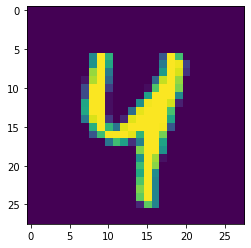

In [8]:
x=x_test[42]
plt.imshow(x.reshape(img_rows,img_cols))

In [9]:

x = x.reshape(1,img_rows,img_cols,1)

out = model.predict(x)

print(np.argmax(out,axis=1)[0])

4
